(sec:standardmodels:subsec:sir)=
# SIR Model

The SIRD model is the simplest epidemiological model possible. However, for COVID-19 dynamics, it is far too simple. Nevertheless we can introduce general principles that govern all epidemiological models describing the spread of COVID-19.

In contrast to the notation in the previous sections, we use types with  specific interpretations as in {numref}`tab:sec:standard:subsec:sir:types` in the following. 
We denote the types in the rules and the number of individuals of respective types in the propensities with the same italic symbols. For the formulations of ODEs and their analysis we consider the associated concentrations and denote them by roman symbols. By this we emphasize the qualitative properties  of the ODE solution are independent of the actual total number $N$ of individuals.

:::{list-table} The types of the standard SIR model.
:name: tab:sec:standard:subsec:sir:types
:header-rows: 1

* - Type
  - Interpretation
* - $S$
  - Susceptible
* - $I$
  - Infectious
* - $R$
  - Recovered
* - $D$
  - Deceased
:::

For reaction constants $\iota,\rho > 0$, the following rules describe type changes:

:::{math}
:label: eq:sec:standard:subsec:sir
\begin{equation}
\begin{alignedat}{5}
	S + I &\xrightarrow{\iota} && 2 I  &\quad\text{[Infections]}\\
	    I &\xrightarrow{\rho}  &&   R  &\quad\text{[Recovery]}\\
\end{alignedat}
\end{equation}
:::

Here, the infectious rate $\iota$ controls the rate of spread, i.e. $\iota$ represents the probability of
transmitting the disease between a susceptible and an infectious individual. The recovery rate $\rho = 1/\tau$ is determined by the average duration $\tau$ of the infection. Motivated by the COVID-19 pandemic, where numbers of deceased individuals are highly relevant, we introduce a death rate $\delta$:

:::{math}
:label: eq:sec:standard:subsec:sird
\begin{equation}
\begin{alignedat}{5}
	I &\xrightarrow{\delta} && D &\quad\text{[Death]}\\
\end{alignedat}
\end{equation}
:::

A model consisting of {eq}`eq:sec:standard:subsec:sir` and {eq}`eq:sec:standard:subsec:sird` is also referred to as an SIRD model. We denote the concentrations by $\cS,\cI,\cR$ and the associated number of individuals by $\nS,\nI, \nR$, i.e. $\nS=\cS N$, $\nI =\cI N$ and  $\nR = \cR N$.

For the sake of completeness, we summarise the SIRD model for concentrations $\cS,\cI,\cR$ in {eq}`eq:sec:standard:subsec:sir_ODEconcentrations` with propensities {eq}`eq:sec:standard:subsec:sird-SSApropensities` for the associated number of individuals $\nS,\nI, \nR$:

:::::{panels}
Propensities with numbers:
^^^^

:::{math}
:label: eq:sec:standard:subsec:sird-SSApropensities
\begin{equation}
\begin{aligned}
    \kappa_1(S, I, R, D) &= \frac{\iota}{N} S I,\\
    \kappa_2(S, I, R, D) &= \rho I,\\
    \kappa_3(S, I, R, D) &= \delta I.
\end{aligned}
\end{equation}
:::

----

ODEs for concentrations:
^^^^

:::{math}
:label: eq:sec:standard:subsec:sir_ODEconcentrations
\begin{equation}
\begin{aligned}
   	\frac{d S}{d t} &= - \iota S I,\\
   	\frac{d I}{d t} &= \iota S I -\rho I - \delta I,\\
   	\frac{d R}{d t} &= \rho I,\\
   	\frac{d D}{d t} &= \delta I.
\end{aligned}
\end{equation}
:::
:::::

Another possible addition supported by data on COVID-19 is the loss of immunity:

:::{math}
:label: eq:sec:standard:subsec:sird-loss
\begin{align}
	\begin{split}
	R &\xrightarrow{ \lambda} S \;\; \text{[Loss of Immunity]}\\ 
	\end{split}
\end{align}
:::

Here, $\lambda > 0$ is the rate with which immunity is lost. Loss of immunity is relevant for forecasting herd immunity or the long-time perspectives of vaccination strategies.

%------SUBSUBSECTION---------
(sec:standard:subsubsec:sird-numericalSimulations)=
## Numerical Simulations

As proof of concept we simulate toy models and try to reproduce features observable in reality. We provide possible interpretations of the results without proof.

The parameters are inspired by COVID-19 but not derived explicitly. Therefore we avoid labeling the time unit, but you may think of days. Also the parameters for the rates are exaggerated and adjusted, such that for a total population of $N = 1000$ the different types are clearly recognisable in these small figures. We keep throughout all toy models the basic parameter set $\iota^0 = 0.2$, $\rho^0 = 0.02$ and $\delta^0 = 0.01$ only modifying them according to the extended models. For a coherent compilation see {numref}`table:sec:simulation_parameters` in the Appendix.
The initial number of infectious individuals is always $\nI_0^0 = 3$. In {numref}`fig:plotSIRD(SSA-ODE)`, numerical results for the SIRD model {eq}`eq:sec:standard:subsec:sir_ODEconcentrations` with basic parameters for a SSA and an ODE solver are shown. After an exponential growth for the number of infectious, their number decrease due to the reduced number of susceptible individuals absorbed by the recovered and deceased. For this single realisation of SSA in {numref}`fig:plotSIRD(SSA)` 3 susceptible individuals survive the epidemic. The ODE simulation in {numref}`fig:plotSIRD(ODE)` reveals a strictly positive share of susceptibles. The SSA and ODE simulations are relatively similar for this parameter setting and chosen random seed.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.patches import Patch

#from myst_nb import glue

In [2]:
def plotFilled(
    N, T, time, Ss, Is, Rs, Ds,
    ptitle=None, plegend=True, pplot=True,
    figsize=(20,8),
    colors=['tab:orange', 'tab:green', 'tab:blue', 'black'],
    step='post'
):

    typenames  = ["I", "S", "R", "D"]
        
    nX  = np.c_[Is, Ss, Rs, Ds]
    nXS = np.cumsum(nX, axis=1)
    nXS = np.hstack((np.zeros((nXS.shape[0], 1)),nXS)) # adding zero basis
    
    fig, ax = plt.subplots(figsize=figsize)
    
    y = 0
    for ty in range(4):
        y += 1
        ax.fill_between(time, nXS[:,y-1], nXS[:,y],
                        step=step,
                        color = colors[ty],
                        alpha = 0.8,
                        label = f'${typenames[ty]}$')
            
    for i in range(4):
        ax.text(min(T,time[-1]), 0.5*(nXS[-1,i]+nXS[-1,i+1]), "{:3.0f} % ".format(100*nX[-1,i]/N), ha='right',
                path_effects=[path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

    ax.set_xlim((0,T))
    ax.set_ylim((0,N))        
    
    if plegend:
        handles, labels = ax.get_legend_handles_labels()
        handles, labels = handles[::-1], labels[::-1]
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        legend = ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), shadow=False, fontsize='x-large', frameon=False)
    if ptitle is not None:
        ax.set_title(ptitle)
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Individuals')
    
    if pplot:
        plt.show(); 
    return fig

In [3]:
def ODE(
    T, N, Sinit, Iinit, Rinit, Dinit,
    deriv,
    **kwargs
):
    t = 0.
    
    # converting to concentrations (for consistency)
    S0 = Sinit / N
    I0 = Iinit / N
    R0 = Rinit / N
    D0 = Dinit / N
    
    Y0 = np.hstack((S0, I0, R0, D0))
    
    sol = solve_ivp(lambda t, Y: deriv(t, Y, **kwargs), y0=Y0, t_span=(0, T), t_eval=np.arange(T+1))
    return (sol.t, *(N * sol.y))

def deriv(t, Y, iota, rho, delta):
    S, I, R, D = Y[0], Y[1], Y[2], Y[3]
    
    dYdt = np.zeros(4)
    dYdt[0] = -S*I*iota                       # dS/dt
    dYdt[1] =  S*I*iota - (rho + delta) * I   # dI/dt
    dYdt[2] =              rho          * I   # dR/dt
    dYdt[3] =                    delta  * I   # dD/dt
    return dYdt

In [4]:
def Gillespie(
    T, N, Sinit, Iinit, Rinit, Dinit,
    seed,
    updateStates, updatePropensities,
    **kwargs
):
    
    # Inital values
    t = 0.
    S = Sinit
    I = Iinit
    R = Rinit
    D = Dinit
    
    # Vectors for time series
    time = [t]
    Ss   = [S]
    Is   = [I]
    Rs   = [R]
    Ds   = [D]

    
    # Random Generator
    rg = np.random.RandomState(seed)

    # Main loop
    while t < T:
        if (I == 0): # no infectives any more means epidemic dies out
            break
            
        # First uniformily distributed ranmdom number for reaction time
        r1  = rg.uniform(0., 1.)
        
        # Propensities calculation
        kappa = updatePropensities(S, I, R, D, N, **kwargs)
        Phi   = kappa.sum()
        
        # waiting time tau
        tau = -np.log(r1) / Phi
        t   = t + tau
  
        # Second uniformily distributed random number for executed reaction
        r2 = rg.uniform(0., 1.)
        
        # Rule determined to be executed
        bins = np.cumsum(kappa) / Phi
        rExc = np.searchsorted(bins, r2, side='right')
        
        # Update states
        S, I, R, D = updateStates(rExc, S, I, R, D)
        
        # Append new values
        time.append(t)
        Ss.append(S)
        Is.append(I)
        Rs.append(R)
        Ds.append(D)
        
    return (time, Ss, Is, Rs, Ds)
        
def updateStates(rExc, S, I, R, D):
    if rExc == 0:         # Infection
        S -= 1
        I += 1
        return S, I, R, D
    if rExc == 1:         # Recovery
        I -= 1
        R += 1
        return S, I, R, D
    if rExc == 2:         # Death
        I -= 1
        D += 1
        return S, I, R, D
    
def updatePropensities(S, I, R, D, N, iota, rho, delta):
    kappa = np.zeros(3)
    kappa[0] = S * I * iota / N # Infection
    kappa[1] =     I * rho      # Recovery
    kappa[2] =     I * delta    # Death
    return kappa

Parameters:

In [5]:
T     = 300
N     = 1000

iota  = 0.2
rho   = 0.02
delta = 0.01

Iinit = 3
Sinit = N - Iinit
Rinit = 0
Dinit = 0

seed = 0

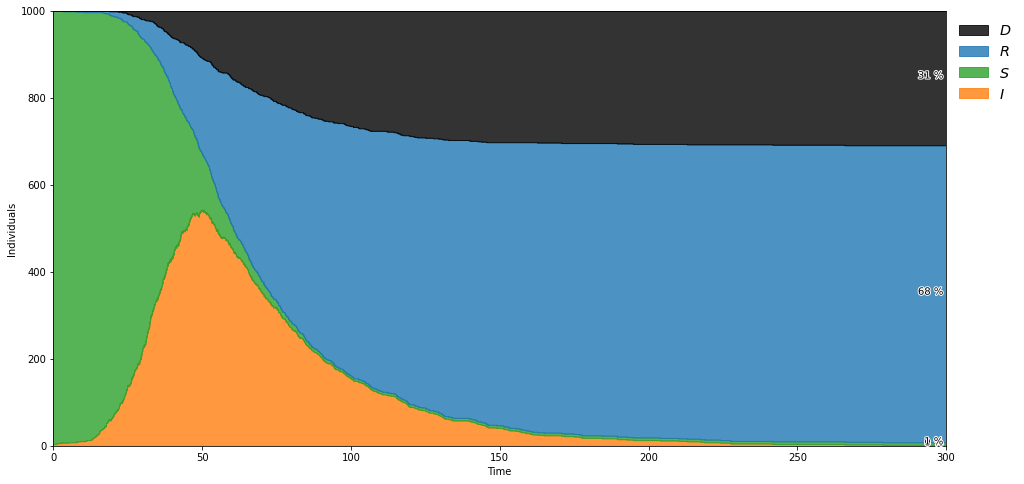

In [6]:
t_SSA, S_SSA, I_SSA, R_SSA, D_SSA = Gillespie(
    T=T, N=N, Sinit=Sinit, Iinit=Iinit, Rinit=Rinit, Dinit=Dinit,
    seed = seed,
    updateStates=updateStates, updatePropensities=updatePropensities,                      
    iota=iota, rho=rho, delta=delta
)

fig = plotFilled(N, T, t_SSA, S_SSA, I_SSA, R_SSA, D_SSA)

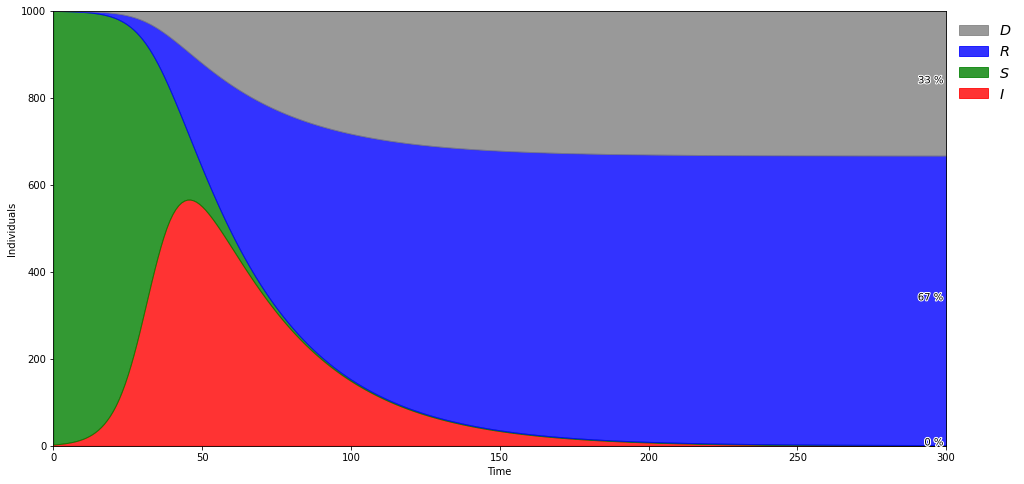

In [7]:
t_ODE, S_ODE, I_ODE, R_ODE, D_ODE =  ODE(
    T=T, N=N, Sinit=Sinit, Iinit=Iinit, Rinit=Rinit, Dinit=Dinit,
    deriv=deriv,
    iota=iota, rho=rho, delta=delta
)

fig = plotFilled(N, T, t_ODE, S_ODE, I_ODE, R_ODE, D_ODE, colors=['red', 'green', 'blue', 'gray'], step=None)